In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_diabetes

sk_model = linear_model.LinearRegression()

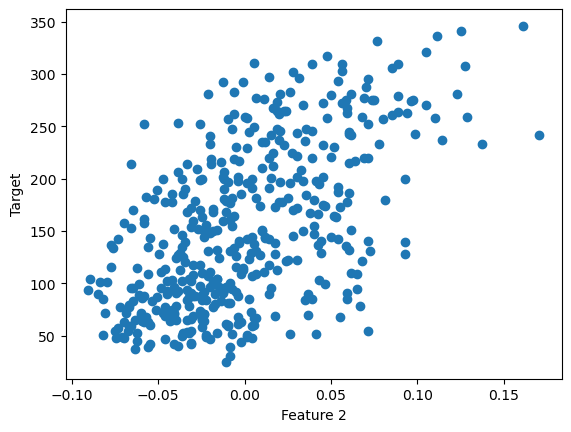

In [44]:
from sklearn import datasets
import matplotlib.pyplot as plt

diabetes = datasets.load_diabetes()

# Accessing the features and target variables
X = diabetes.data
y = diabetes.target

# Example of plotting the data
plt.scatter(X[:, 2], y)  # Using the third feature for demonstration
plt.xlabel('Feature 2')
plt.ylabel('Target')
plt.show()

!pip install scikit-learn
!pip install scikit-learn

In [45]:
N = 20
ftr = np.linspace(-10, 10, num=N)
tgt = 2*ftr**2 - 3 + np.random.uniform(-2, 2, N)

(train_ftr, test_ftr, train_tgt, test_tgt) = train_test_split(ftr, tgt, test_size=N//2)

df = pd.DataFrame({"ftr": train_ftr, "tgt": train_tgt}).T
display(df)

,0,1,2,3,4,5,6,7,8,9
ftr,-8.947368,-5.789474,5.789474,-7.894737,6.842105,-4.736842,3.684211,4.736842,1.578947,-10.000000
tgt,155.373393,63.663507,65.140002,122.836657,89.840379,41.348554,24.193373,41.679969,1.644149,198.517662


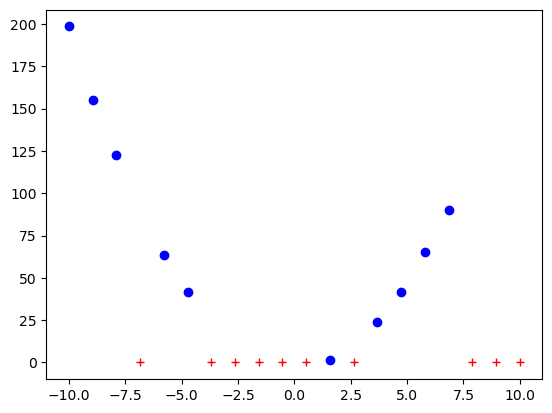

In [46]:
plt.plot(train_ftr, train_tgt, 'bo')
plt.plot(test_ftr, np.zeros_like(test_ftr), 'r+');

In [47]:
sk_model = linear_model.LinearRegression()
sk_model.fit(train_ftr.reshape(-1, 1), train_tgt)
sk_preds = sk_model.predict(test_ftr.reshape(-1, 1))
sk_preds[:3]

array([87.57797538, 68.06649096, 55.05883468])

In [48]:
model_one = np.poly1d(np.polyfit(train_ftr, train_tgt, 1))
preds_one = model_one(test_ftr)
print(preds_one[:3])

[87.57797538 68.06649096 55.05883468]


In [49]:
print("all close?", np.allclose(sk_preds, preds_one))

mse = metrics.mean_squared_error
print("RMSE:", np.sqrt(mse(test_tgt, preds_one)))

all close? True
RMSE: 97.11376123812029


In [50]:
model_two = np.poly1d(np.polyfit(train_ftr, train_tgt, 2))
preds_two = model_two(test_ftr)
print("RMSE:", np.sqrt(mse(test_tgt, preds_two)))

RMSE: 1.506262387451318


In [51]:
model_three = np.poly1d(np.polyfit(train_ftr, train_tgt, 9))
preds_three = model_three(test_ftr)
print("RMSE:", np.sqrt(mse(test_tgt, preds_three)))

RMSE: 271.7623019367443


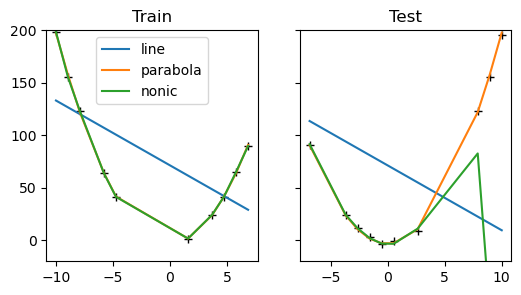

In [52]:
fig, axes = plt.subplots(1,2, figsize=(6,3), sharey=True)

labels = ['line', 'parabola', 'nonic']
models = [model_one, model_two, model_three]
train = (train_ftr, train_tgt)
test  = (test_ftr, test_tgt)

for ax, (ftr, tgt) in zip(axes, [train, test]):
    ax.plot(ftr, tgt, 'k+')
    for m, lbl in zip(models, labels):
        ftr = sorted(ftr)
        ax.plot(ftr, m(ftr), '-', label=lbl)

axes[1].set_ylim(-20, 200)
axes[0].set_title("Train")
axes[1].set_title("Test");
axes[0].legend(loc='upper center');

In [53]:
results = []
for complexity in [1,2,6,9]:
    model = np.poly1d(np.polyfit(train_ftr, train_tgt, complexity))
    train_error = np.sqrt(mse(train_tgt, model(train_ftr)))
    test_error = np.sqrt(mse(test_tgt, model(test_ftr)))
    results.append((complexity, train_error, test_error))
   
columns = ["Complexity", "Train Error", "Test Error"]
results_df = pd.DataFrame.from_records(results, 
                                       columns=columns,
                                       index="Complexity")

results_df

,Train Error,Test Error
Complexity,,
1,4.389179e+01,97.113761
2,9.275147e-01,1.506262
6,8.060189e-01,2.604004
9,2.280667e-13,271.762302


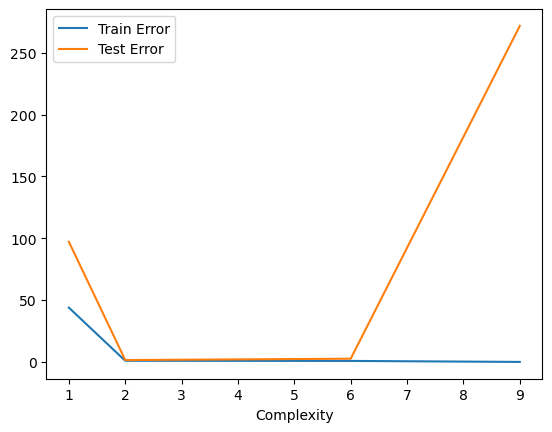

In [54]:
results_df.plot();

In [55]:
def training_loss(single_loss, model, training_data):
    ' total training_loss on train_data with model under single_loss'
    pred_act = ((model.predict(ftrs.reshape(1,-1)), tgt) 
                       for ftrs, tgt in training_data)
    return sum(single_loss(p,a) for p,a in pred_act)

def squared_error(prediction, actual):
    ' squared error on a single example '
    return (prediction-actual)**2

In [56]:
from sklearn import datasets

diabetes = datasets.load_diabetes()
!pip install scikit-learn


diabetes = datasets.load_diabetes()

In [57]:
from sklearn import datasets
from sklearn import neighbors
knn   = neighbors.KNeighborsRegressor(n_neighbors=3)
fit   = knn.fit(diabetes.data, diabetes.target)

training_data = zip(diabetes.data, diabetes.target)
my_training_loss = training_loss(squared_error, 
                                 knn, 
                                 training_data)
print(my_training_loss)

[863792.33333333]


In [58]:
from sklearn import metrics
mse = metrics.mean_squared_error(diabetes.target,
                                 knn.predict(diabetes.data))
print(mse*len(diabetes.data))

863792.3333333333


In [59]:
import sklearn.model_selection as skms

In [60]:
def tts_fit_eval(model, data, msr, test_size=.25):
    ' apply a train-test split to fit model on data and eval with msr '
    tts = skms.train_test_split(data.data, 
                                data.target, 
                                test_size=test_size)

    (train_ftrs, test_ftrs, train_tgt,  test_tgt) = tts
    
    fit   = model.fit(train_ftrs, train_tgt)
    preds = fit.predict(test_ftrs)

    result = msr(test_tgt, preds)
    return result

In [61]:
linreg   = linear_model.LinearRegression()
diabetes = datasets.load_diabetes()

mses = []
for r in range(10):
    mse = tts_fit_eval(linreg, 
                       diabetes, 
                       metrics.mean_squared_error)
    mses.append(mse)
# or for Python-ninjas:
# mses = [tts_fit_score(... as above ...) for i in range(10)]
    
    
rmses = pd.Series(np.sqrt(sorted(mses)))
df_man = pd.DataFrame({'RMSE':rmses})
df_man.index.name = 'Repeat'
display(df_man.T)

Repeat,0,1,2,3,4,5,6,7,8,9
RMSE,50.266736,53.336765,54.559303,54.780911,56.156134,58.804747,59.452776,59.928518,60.501848,62.296954


,count,mean,std,min,25%,50%,75%,max
RMSE,10.0,57.008469,3.778874,50.266736,54.614705,57.48044,59.809583,62.296954


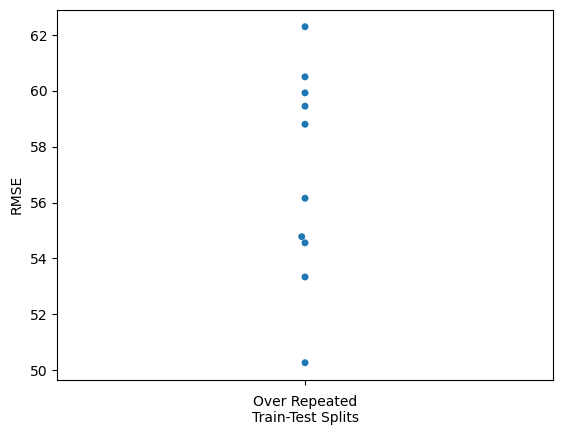

In [62]:
ax = sns.swarmplot(y='RMSE', data=df_man)
ax.set_xlabel('Over Repeated\nTrain-Test Splits')
display(df_man.describe().T)

,count,mean,std,min,25%,50%,75%,max
RMSE,10.0,55.459302,3.244912,51.117301,53.097531,54.652441,57.556451,61.25132


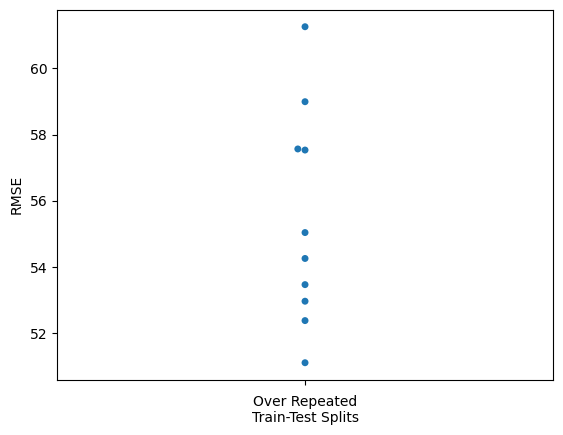

In [63]:
linreg = linear_model.LinearRegression()

ss = skms.ShuffleSplit(test_size=.25) # default is .1 (10 splits)
scores = skms.cross_val_score(linreg, 
                              diabetes.data, diabetes.target,
                              cv=ss, 
                              scoring='neg_mean_squared_error')

# convert to -MSE to RMSE
rmses = pd.Series(np.sqrt(-scores))
df_sk = pd.DataFrame({'RMSE':rmses})
df_sk.index.name = 'Repeat'

display(df_sk.describe().T)

ax = sns.swarmplot(y='RMSE', data=df_sk)
ax.set_xlabel('Over Repeated\nTrain-Test Splits');

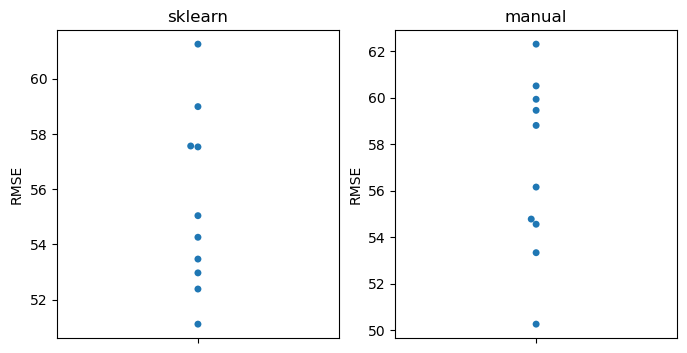

In [64]:
fig, ax = plt.subplots(1,2, figsize=(8,4))
sns.swarmplot(y='RMSE', data=df_sk,  ax=ax[0]).set_title('sklearn')
sns.swarmplot(y='RMSE', data=df_man, ax=ax[1]).set_title('manual');

In [65]:
iris = datasets.load_iris()

train_sizes = np.linspace(.1,1.0,10)
nn = neighbors.KNeighborsClassifier() 
num_folds = 5

(train_N, 
 train_scores, 
 test_scores) = skms.learning_curve(nn, 
                                    iris.data, iris.target, 
                                    cv=num_folds, 
                                    train_sizes=train_sizes)

df = pd.DataFrame(test_scores, index=(train_sizes*100).astype(np.int))
df['Mean 5-CV'] = df.mean(axis='columns')
df.index.name = "% Data Used"

display(df)

/Users/sydniemarfione/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/sydniemarfione/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

,0,1,2,3,4,Mean 5-CV
% Data Used,,,,,,
10,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
20,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
30,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
40,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667
50,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667
60,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667
70,0.900000,0.800000,0.833333,0.866667,0.800000,0.840000
80,0.966667,0.933333,0.900000,0.900000,0.966667,0.933333
90,0.966667,1.000000,0.900000,0.966667,1.000000,0.966667


In [66]:
def sk_table_to_tidy(train_test_scores, 
                     eval_points,       
                     eval_label,        
                     num_folds):        

    labels = easy_combo(eval_points, 
                        [0,1], 
                        np.arange(num_folds))
    df = pd.DataFrame.from_records(labels)
    df.columns = [eval_label, 'set', 'fold']
    df.set = df.set.replace({0:'Train', 1:'Test'})

    train_scores, test_scores = train_test_scores
    score = np.concatenate([train_scores.flatten(), 
                            test_scores.flatten()], axis=0)    
    df['score'] = score
    return df